In [2]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

In [23]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((16, 16)), torchvision.transforms.ToTensor()])

In [24]:
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
val_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:01<00:00, 17717399.84it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305800.78it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5591851.47it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12814407.71it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [25]:
class CNN(nn.Module):
    
    def __init__(self, out_1=16, out_2=32,out_3=64):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=2, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [26]:
model = CNN()

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=100)

In [28]:
lost_list=[]
accuracy_list=[]
N_test=len(val_data)
COST = 0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        lost_list.append(COST)
        correct=0
        
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        print('Epoch:',epoch+1,'Cost:',COST,'Accuracy',accuracy)
         
train_model(10)

Epoch: 1 Cost: tensor(499.9914) Accuracy 0.7693
Epoch: 2 Cost: tensor(323.7361) Accuracy 0.811
Epoch: 3 Cost: tensor(282.3474) Accuracy 0.8285
Epoch: 4 Cost: tensor(262.3987) Accuracy 0.8367
Epoch: 5 Cost: tensor(249.4850) Accuracy 0.8436
Epoch: 6 Cost: tensor(239.8683) Accuracy 0.8478
Epoch: 7 Cost: tensor(232.1609) Accuracy 0.8529
Epoch: 8 Cost: tensor(225.6761) Accuracy 0.8566
Epoch: 9 Cost: tensor(220.0594) Accuracy 0.8592
Epoch: 10 Cost: tensor(215.2667) Accuracy 0.8622


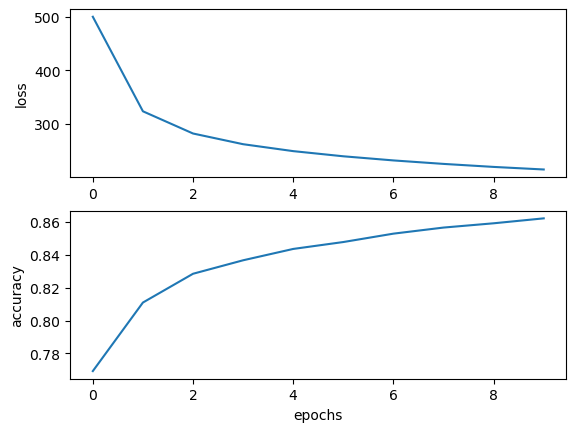

In [29]:
plt.subplot(2,1,1)
plt.plot(lost_list)
plt.ylabel('loss')

plt.subplot(2,1,2)
plt.plot(accuracy_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()